# Задание 1

## 1)


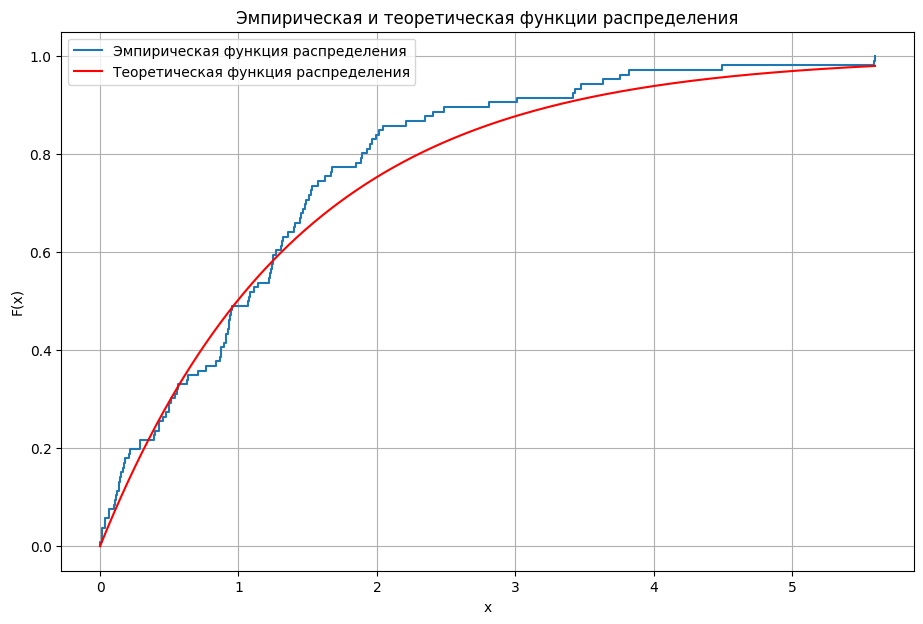

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, iqr, f, norm
from statsmodels.distributions.empirical_distribution import ECDF

lm = 0.1*7 
N = 100+6       

#создание выборки с использованием метода обратных функций
un_sam = np.random.uniform(0,1,N)
expon_sam = -np.log(1-un_sam)/lm

#эмпирическая функция распределения
ecdf = ECDF(expon_sam,side='right')

#теоретическая функция распределения
x_th = np.linspace(0,max(expon_sam),1000)
y_th = expon.cdf(x_th,scale=1/lm)

plt.figure(figsize=(11,7))
plt.step(ecdf.x,ecdf.y,label='Эмпирическая функция распределения',where='post')
plt.plot(x_th,y_th,label='Теоретическая функция распределения',color='red')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Эмпирическая и теоретическая функции распределения')
plt.legend()
plt.grid(True)
plt.show()

## 2)

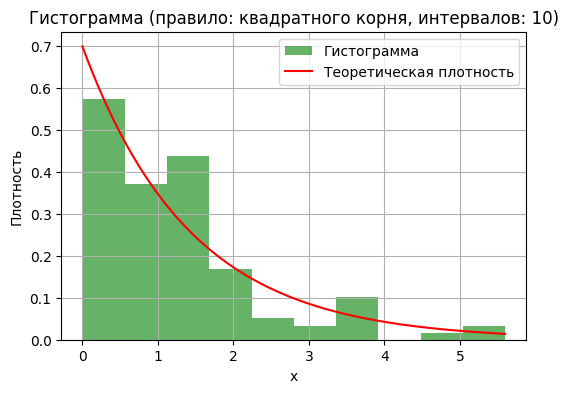

Максимальное отклонение: 0.2226


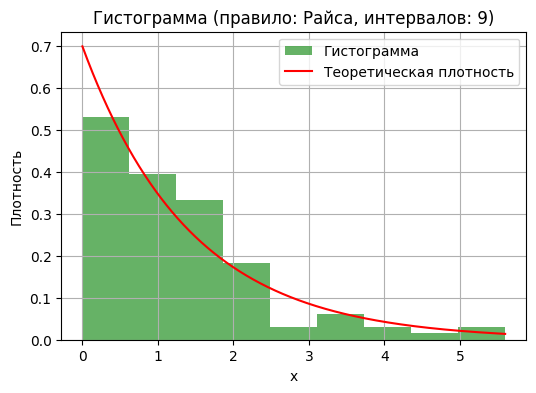

Максимальное отклонение: 0.1677


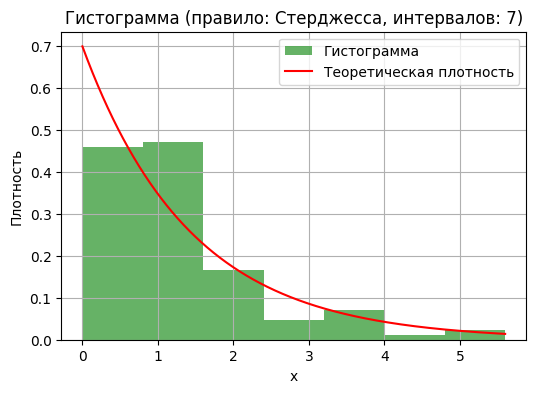

Максимальное отклонение: 0.2439


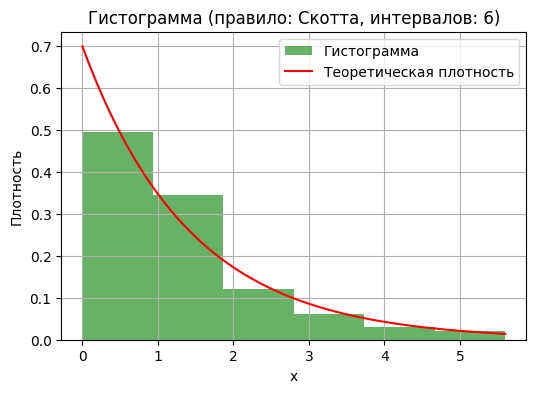

Максимальное отклонение: 0.2031


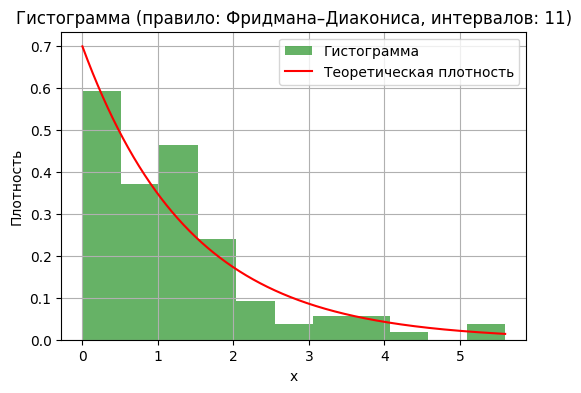

Максимальное отклонение: 0.2235

Рейтинг правил по точности (от лучшего к худшему):
1. Райса: 0.1677
2. Скотта: 0.2031
3. квадратного корня: 0.2226
4. Фридмана–Диакониса: 0.2235
5. Стерджесса: 0.2439


In [23]:
#функция для расчета числа интервалов
def calc(sam,rule):
    n = len(sam)
    if rule == "sqrt":
        return int(np.sqrt(n))
    elif rule == "rice":
        return int(2*n**(1/3))
    elif rule == "sturges":
        return int(1+np.log2(n))
    elif rule == "scott":
        h = 3.5*np.std(sam) * n**(-1/3)
        return int((np.max(sam)-np.min(sam))/h)
    elif rule == "fd":
        h = 2*iqr(sam) * n** (-1/3)
        return int((np.max(sam)-np.min(sam))/h)
    else:
        raise ValueError("Неизвестное правило")

rules = ["sqrt","rice","sturges","scott","fd"]
rule_names = {
    "sqrt": "квадратного корня",
    "rice": "Райса",
    "sturges": "Стерджесса",
    "scott": "Скотта",
    "fd": "Фридмана–Диакониса"}

#оценка отклонения и построение гистограммы
def hist(sam,rule):
    bins = calc(sam,rule)
    counts, bin_edges = np.histogram(sam,bins=bins,density=True)
    max_dev = 0
    for i in range(len(bin_edges) - 1):
        x = np.linspace(bin_edges[i],bin_edges[i + 1],100)
        th_den = expon.pdf(x,scale=1/lm)
        emp_den = counts[i]
        dev = np.max(np.abs(emp_den-th_den))
        if dev > max_dev:
            max_dev = dev
    
    plt.figure(figsize=(6,4))
    plt.hist(sam,bins=bins,density=True,alpha=0.6,color='g',label='Гистограмма')
    x_plot = np.linspace(min(sam),max(sam),1000)
    plt.plot(x_plot,expon.pdf(x_plot,scale=1/lm),'r-',label='Теоретическая плотность')
    plt.title(f'Гистограмма (правило: {rule_names[rule]}, интервалов: {bins})')
    plt.xlabel('x')
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return max_dev
    
results = {}
for rule in rules:
    results[rule] = hist(expon_sam,rule)
    print(f"Максимальное отклонение: {results[rule]:.4f}")

rank = sorted(results.keys(), key=lambda x:results[x])
print("\nРейтинг правил по точности (от лучшего к худшему):")
for i, rule in enumerate(rank,1):
    print(f"{i}. {rule_names[rule]}: {results[rule]:.4f}")

#### Рейтинг правил не остается примерно одинаковым для разных выборок, что говорит о его неустойчивости 


# Задание 2

## 1)

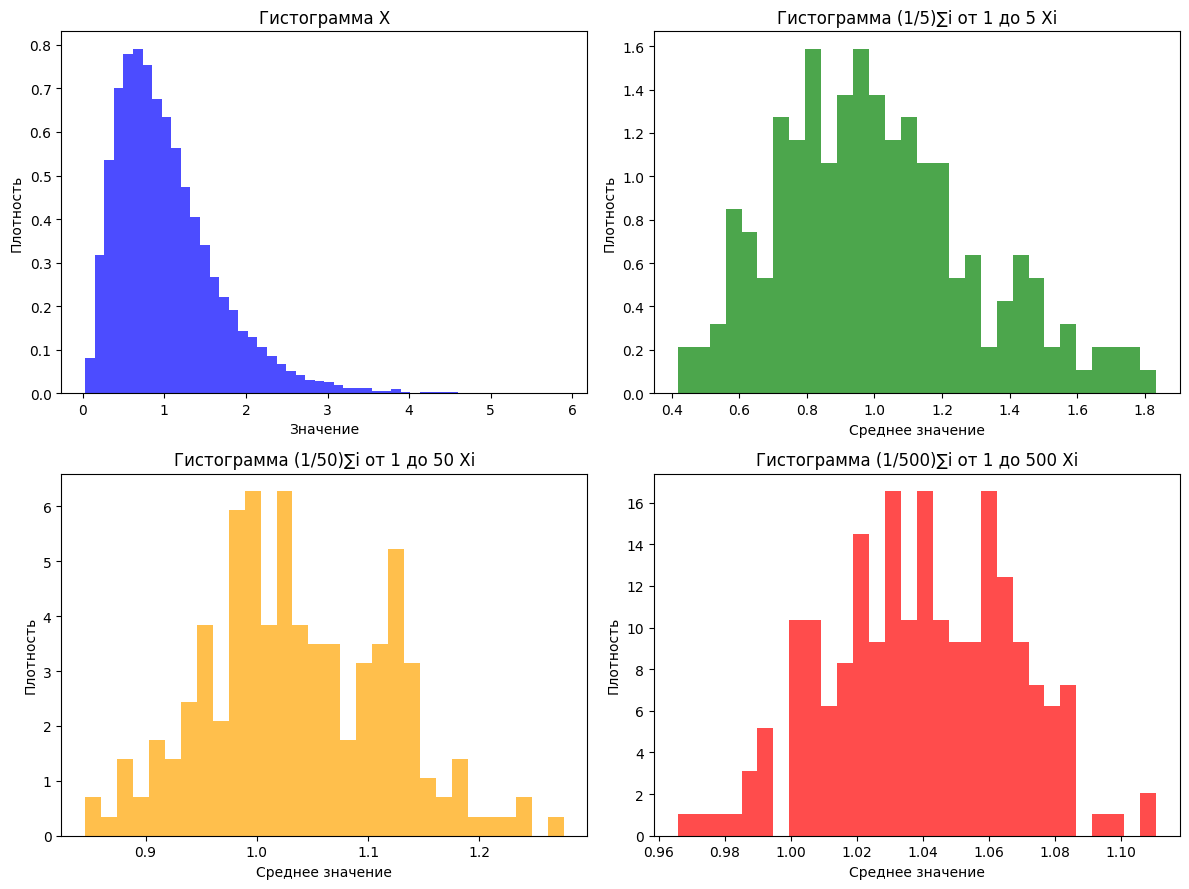

In [28]:
d1 = 6
d2 = 58

m = d2/(d2-2) 
sigma2 = (2 * d2**2 * (d1+d2-2)) / (d1 * (d2-2)**2 * (d2-4)) 
sigma = np.sqrt(sigma2)

#выборка
np.random.seed(42)
sample_size = 200
X = np.random.f(d1, d2, size=10000)

#создание средних значений для различных объемов выборок
mean_5 = [np.mean(np.random.f(d1,d2,size=5)) for _ in range(sample_size)]
mean_50 = [np.mean(np.random.f(d1,d2,size=50)) for _ in range(sample_size)]
mean_500 = [np.mean(np.random.f(d1,d2,size=500)) for _ in range(sample_size)]


sigma_mean_5 = sigma/np.sqrt(5)
sigma_mean_50 = sigma/np.sqrt(50)
sigma_mean_500 = sigma/np.sqrt(500)

plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
plt.hist(X,bins=50,color='blue',alpha=0.7,density=True)
plt.title('Гистограмма X')
plt.xlabel('Значение')
plt.ylabel('Плотность')

plt.subplot(2,2,2)
plt.hist(mean_5,bins=30,color='green',alpha=0.7,density=True)
plt.title('Гистограмма (1/5)∑i от 1 до 5 Xi')
plt.xlabel('Среднее значение')
plt.ylabel('Плотность')

plt.subplot(2,2,3)
plt.hist(mean_50,bins=30,color='orange',alpha=0.7,density=True)
plt.title('Гистограмма (1/50)∑i от 1 до 50 Xi')
plt.xlabel('Среднее значение')
plt.ylabel('Плотность')

plt.subplot(2,2,4)
plt.hist(mean_500,bins=30,color='red',alpha=0.7,density=True)
plt.title('Гистограмма (1/500)∑i от 1 до 500 Xi')
plt.xlabel('Среднее значение')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

## 2) Наложение графика плотности на гистограмму (1/500)∑i от 1 до 500 Xi

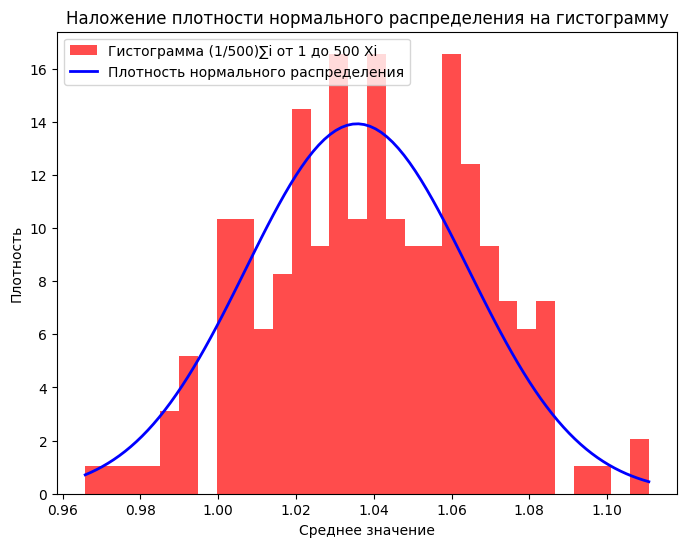

In [29]:
x_values = np.linspace(min(mean_500),max(mean_500),100)
norm_den = norm.pdf(x_values,loc=m,scale=sigma_mean_500)

plt.figure(figsize=(8,6))
plt.hist(mean_500,bins=30,density=True,color='red',alpha=0.7,label='Гистограмма (1/500)∑i от 1 до 500 Xi')
plt.plot(x_values,norm_den,color='blue',label='Плотность нормального распределения',linewidth=2)
plt.title('Наложение плотности нормального распределения на гистограмму')
plt.xlabel('Среднее значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()